# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


In [112]:
# First Import the python modules required for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [113]:
# Import the csv into a dataframe and use include a shorter name for the dataframe
leg = life_expectancy_gdp = pd.read_csv('all_data.csv')

In [114]:
# Preview the dataframe
print(leg.head(5))
print(leg.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


### Exporatory Plots


Average Life expectancy is the lowest in Zimbabwe, with China, US and Mexico being equal

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64
['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
[78.94375, 74.2625, 79.65625, 75.71875, 78.0625, 50.09375]


<function matplotlib.pyplot.clf() -> 'None'>

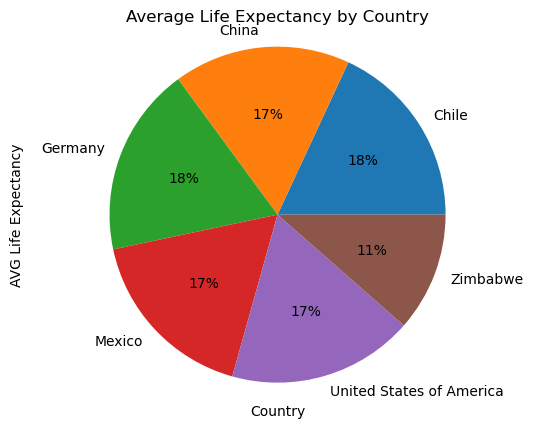

In [117]:
# Average Life Expectancy by countries
AVG_LE_C = leg.groupby('Country')['Life expectancy at birth (years)'].mean() # Group the Countries by its average life expectancy
print(AVG_LE_C)
print(AVG_LE_C.index.to_list())
print(AVG_LE_C.to_list())
label1 = AVG_LE_C.index.to_list()
plt.pie(AVG_LE_C.to_list(), labels=label1,autopct='%1d%%')
plt.title("Average Life Expectancy by Country")
plt.xlabel("Country")
plt.ylabel("AVG Life Expectancy")
plt.axis('equal')
plt.show
plt.clf


Average GDP is the lowest in Zimbabwe & Chile and the highest is the United states of America

<function matplotlib.pyplot.clf() -> 'None'>

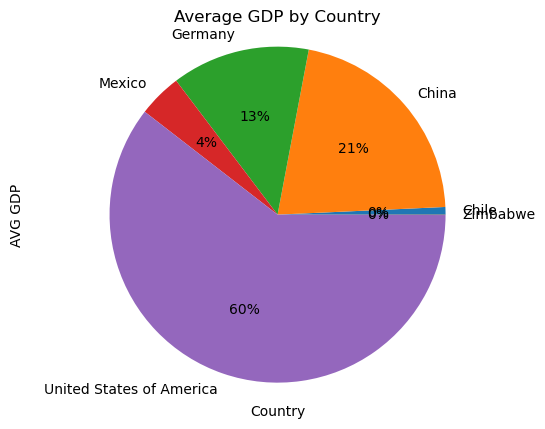

In [121]:
# Average GDP by countries
AVG_GDP_C = leg.groupby('Country')['GDP'].mean() # Group the Countries by its average GDP
label1 = AVG_GDP_C.index.to_list()
plt.pie(AVG_GDP_C.to_list(), labels=label1,autopct='%1d%%')
plt.title("Average GDP by Country")
plt.xlabel("Country")
plt.ylabel("AVG GDP")
plt.axis('equal')
plt.show
plt.clf


No significant difference in the Average life expectancy year on year.

<function matplotlib.pyplot.clf() -> 'None'>

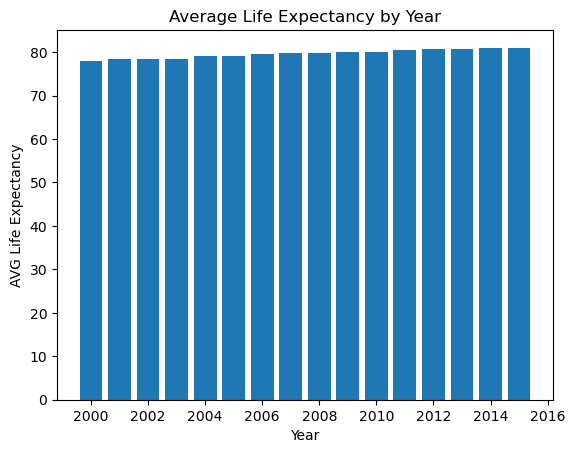

In [123]:
# Average Life Expectancy by year
plt.bar(leg.Year, leg["Life expectancy at birth (years)"])
plt.title("Average Life Expectancy by Year")
plt.xlabel("Year")
plt.ylabel("AVG Life Expectancy")
plt.show
plt.clf


Steady increase in GDP year on year, except in 2009 where it dropped but picked back up in 2010. GDP almost doubles in 15 years.

<function matplotlib.pyplot.clf() -> 'None'>

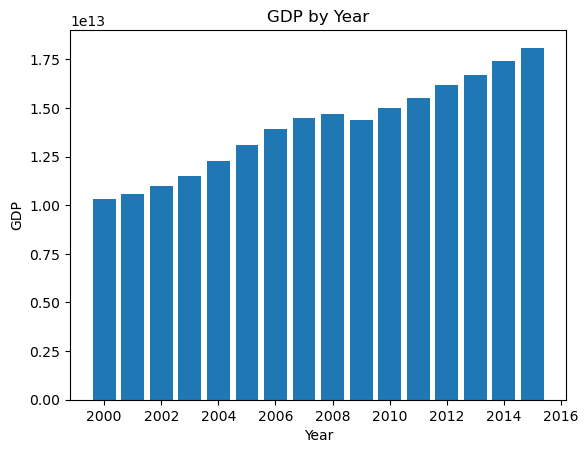

In [124]:
# Average GDP by year
plt.bar(leg.Year, leg["GDP"])
plt.title("GDP by Year")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show
plt.clf


As we already know, Zimbabwe has the lowest Life expectancy, however we can see that it has the fastest growth rate out of all the countries, with the other countries having similar growth rates.

<function matplotlib.pyplot.clf() -> 'None'>

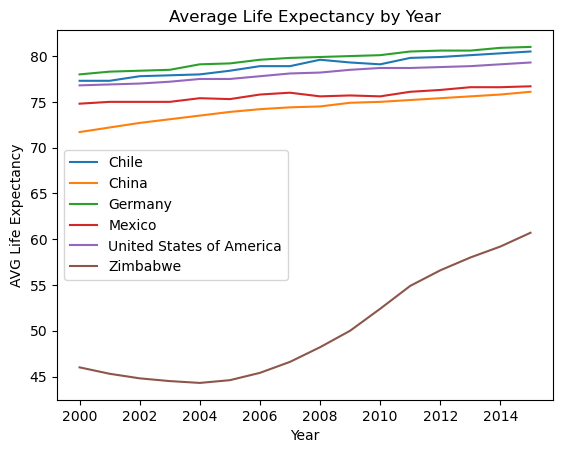

In [133]:
# Average Life Expectancy by year color coded by country

for i in leg.Country.unique():
    plt.plot(leg.loc[leg['Country'] == i, 'Year'], leg.loc[leg['Country'] == i, 'Life expectancy at birth (years)'],label = i)
plt.title("Average Life Expectancy by Year")
plt.xlabel("Year")
plt.ylabel("AVG Life Expectancy")
plt.legend(leg.Country.unique())
plt.show
plt.clf

We can see here that from year 2000 to 2005 China had a lower GDP than Germany after which it skyrocketed x4. The US also shows incredible growth rate

<function matplotlib.pyplot.clf() -> 'None'>

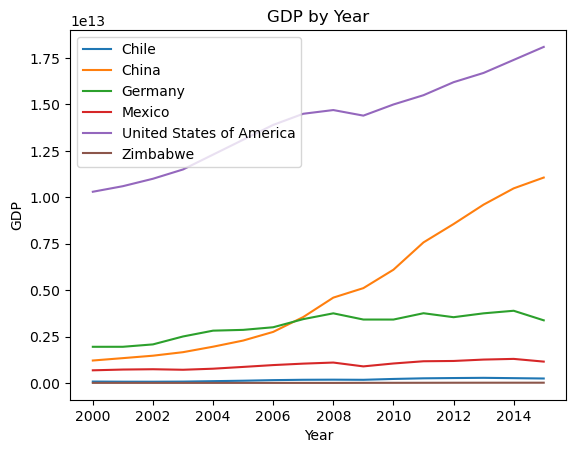

In [126]:
# Average GDP by year color coded by country
for i in leg.Country.unique():
    plt.plot(leg.loc[leg['Country'] == i, 'Year'], leg.loc[leg['Country'] == i, 'GDP'],label = i)
plt.title("GDP by Year")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend(leg.Country.unique())
plt.show
plt.clf


Here we have a positive correlation between life expectancy and GDP, meaning that an increase in GDP leads to higher life expectancy

<function matplotlib.pyplot.clf() -> 'None'>

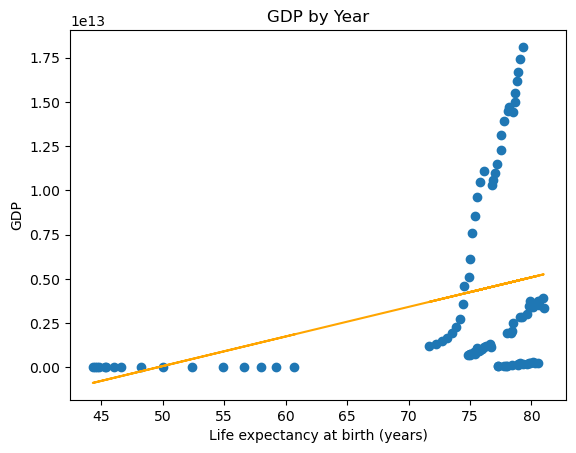

In [128]:
# Correlation of Life expectancy and GDP

plt.scatter(leg['Life expectancy at birth (years)'], leg["GDP"])
m, c = np.polyfit(leg['Life expectancy at birth (years)'], leg["GDP"], 1)
line_y = (m * leg['Life expectancy at birth (years)']) + c
plt.plot(leg['Life expectancy at birth (years)'], line_y, color='orange', linestyle='-', label='Custom Line')
plt.title("GDP by Year")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP")

plt.show
plt.clf


Distribution is not normal and is heavily skewed right, looks more like a exponential curve

<function matplotlib.pyplot.clf() -> 'None'>

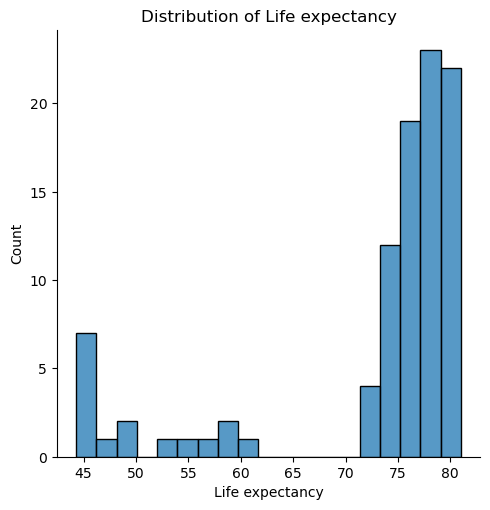

In [129]:
# Distribution of Life expectancy at birth (years)

sns.displot(data=leg, x="Life expectancy at birth (years)", kind="hist")
plt.title("Distribution of Life expectancy")
plt.xlabel("Life expectancy")
plt.ylabel("Count")

plt.show
plt.clf


Distribution is not normal and is heavily skewed right, looks more like a exponential curve

<function matplotlib.pyplot.clf() -> 'None'>

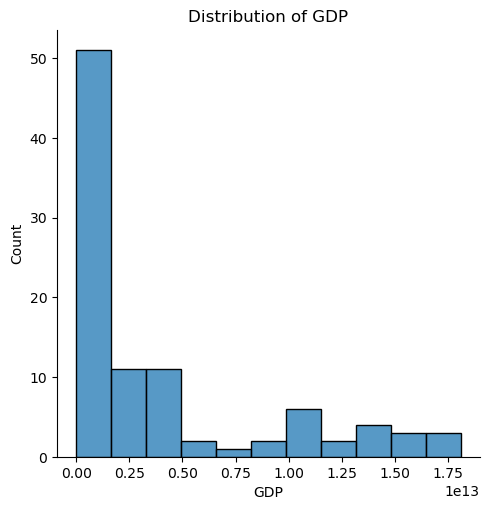

In [135]:
# Distribution of GDP

sns.displot(data=leg, x="GDP", kind="hist")
plt.title("Distribution of GDP")
plt.xlabel("GDP")
plt.ylabel("Count")

plt.show
plt.clf
